In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Increasing Wind Stress

#### Decreasing Wind Stress

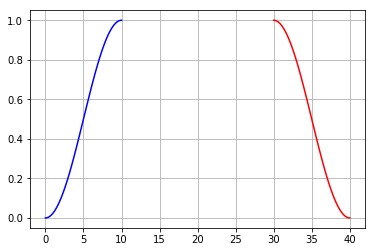

In [54]:
tau_00 = 10
start_of_decrease = 30
x = np.linspace(0,tau_00,100)
y = 0.5*(1-np.cos(x*np.pi/tau_00))
plt.plot(x,y, 'b-')
x2 = np.linspace(start_of_decrease,start_of_decrease+tau_00,100)
y2 = -0.5*(1-np.cos((x2-start_of_decrease)*np.pi/  tau_00)) + 1
plt.plot(x2,y2,'r-')
plt.grid('on')

In [65]:
jpj = 564
jpi = 284
zcdrag = 0.001
zrhoa = 1
njmpp = 1
nn_tau000=100
nn_tau001=100
nn_tau002=200
rn_utau0 = 0
rn_vtau0=0.169
y0 = -50
y_vtau = 400

In [66]:
time = 400
vtau = np.zeros((time,jpi, jpj))
utau = np.zeros((time,jpi, jpj))
taum = np.zeros((time,jpi, jpj))
wndm = np.zeros((time,jpi, jpj))
m = rn_vtau0/(y_vtau - y0)
b = -m*y0
for kt in range(time):
    if kt <= nn_tau000:
        zfact = 0.5 * (  1. - np.cos( np.pi *  kt /  nn_tau000 )  )
        zcoef = 1. / ( zrhoa * zcdrag )
        #ztx   = zfact * rn_utau0
        zty   = zfact * rn_vtau0
        for jj in range(jpj):
            for ji in range(jpi):
                vtau[kt,ji,jj]=m*(jj+njmpp-1)+b
                #utau[kt,ji,jj] = yslopeu * ( jj+njmpp-1 - y0u) / y0u
        vtau[kt,...] = vtau[kt,...] * zty
        #utau[kt,ji,jj] = utau[kt,ji,jj] * ztx
        #taum[kt,...] = np.sqrt( utau[kt,ji,jj] * utau[kt,ji,jj] +
                            #vtau[kt,...] * vtau[kt,ji,jj] )
        wndm[kt,...] = np.sqrt( np.abs(vtau[kt,...])*zcoef)
    elif kt>nn_tau000 and kt < nn_tau002:
        for jj in range(jpj):
            for ji in range(jpi):
                vtau[kt,ji,jj]=m*(jj+njmpp-1)+b
                #utau[kt,ji,jj] = yslopeu * ( jj+njmpp-1 - y0u) / y0u
        #utau[kt,ji,jj] = utau[kt,ji,jj] * ztx
        #taum[kt,...] = np.sqrt( utau[kt,ji,jj] * utau[kt,ji,jj] +
                            #vtau[kt,...] * vtau[kt,ji,jj] )
        wndm[kt,...] = np.sqrt( np.abs(vtau[kt,...])*zcoef)
    elif((( nn_tau002 + nn_tau001) >= kt) and(kt >= nn_tau002)):  
        zfact = -0.5 * (  1. - np.cos( np.pi * (kt-nn_tau002)   / nn_tau001 )  ) + 1
        zcoef = 1. / ( zrhoa * zcdrag )
        ztx   = zfact * rn_utau0
        zty   = zfact * rn_vtau0
        for jj in range( jpj):
            for ji in range ( jpi):
                vtau[kt,ji,jj]=m*(jj+njmpp-1)+b
                #utau[kt,ji,jj] = yslopeu * ( jj+njmpp-1 - y0u ) / y0u
        vtau[kt,...] = vtau[kt,...] * zty
        #utau[kt,ji,jj] = utau[kt,ji,jj] * ztx
        #taum[kt,...] = np.sqrt( utau[kt,ji,jj] * utau[kt,ji,jj] +
                            #vtau[kt,...] * vtau[kt,ji,jj] )
        wndm[kt,...] = np.sqrt( np.abs(vtau[kt,...])*zcoef)
    elif (kt > (nn_tau002+nn_tau001)) :
        vtau[kt,:,:] = 0.
        #utau[kt,:,:] = 0.  
print(vtau[150,100,400])
print(vtau[150,100,100])

0.169
0.0563333333333


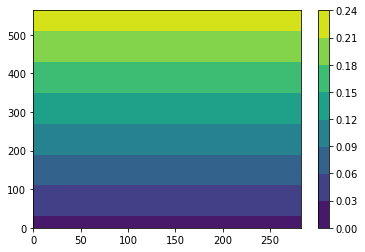

In [114]:
plt.contourf(vtau[150,:,:].T
            )
plt.colorbar()

In [2]:
Q0 = 10**3
C =  10**(-3)
Qa = 1

windspeed = 20
windspeed**2 * Qa * C / Q0 * Q0 

0.4